In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_csv("../data/clean_sales.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
daily_sales = df.groupby("Date")["Sales"].sum()
daily_sales.head()

Date
2024-01-01    43501
2024-01-02    44408
2024-01-03    41190
2024-01-04    46507
2024-01-05    46813
Name: Sales, dtype: int64

In [4]:
model = ExponentialSmoothing(
    daily_sales,
    trend="add",
    seasonal="add",
    seasonal_periods=7
)

model_fit = model.fit()

d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [6]:
# forcasting nxt 30 days
forecast_30 = model_fit.forecast(30)
forecast_30

2024-12-31    40657.575434
2025-01-01    40157.381868
2025-01-02    40935.092564
2025-01-03    39738.258494
2025-01-04    41045.431875
2025-01-05    42009.859285
2025-01-06    41114.107954
2025-01-07    40342.897167
2025-01-08    39842.703602
2025-01-09    40620.414298
2025-01-10    39423.580228
2025-01-11    40730.753608
2025-01-12    41695.181019
2025-01-13    40799.429688
2025-01-14    40028.218901
2025-01-15    39528.025335
2025-01-16    40305.736031
2025-01-17    39108.901961
2025-01-18    40416.075342
2025-01-19    41380.502752
2025-01-20    40484.751421
2025-01-21    39713.540634
2025-01-22    39213.347069
2025-01-23    39991.057765
2025-01-24    38794.223695
2025-01-25    40101.397075
2025-01-26    41065.824486
2025-01-27    40170.073155
2025-01-28    39398.862368
2025-01-29    38898.668802
Freq: D, dtype: float64

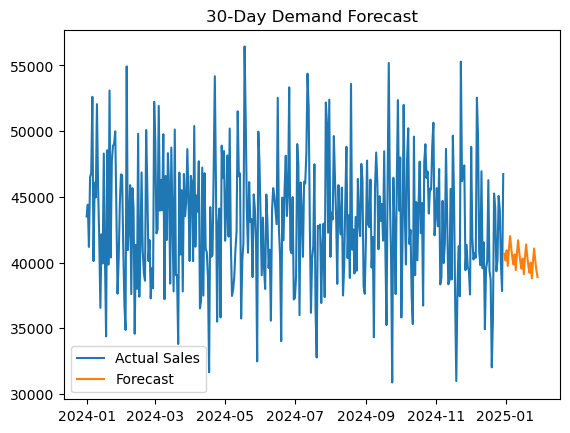

In [7]:
# actual vs forecasted plot
plt.figure()
plt.plot(daily_sales, label="Actual Sales")
plt.plot(forecast_30, label="Forecast")
plt.legend()
plt.title("30-Day Demand Forecast")
plt.show()

In [8]:
forecast_30.to_csv("../outputs/30_day_forecast.csv")